In [74]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city = pd.read_csv(city_data)
ride = pd.read_csv(ride_data)


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [63]:
# Combine the data into a single dataset
city_ride = pd.merge(ride, city, how="left", on="city")

# Display the data table for preview
city_ride.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2018-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2018-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2018-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2018-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2018-03-09 06:26:29,42.81,5327642267789,33,Urban


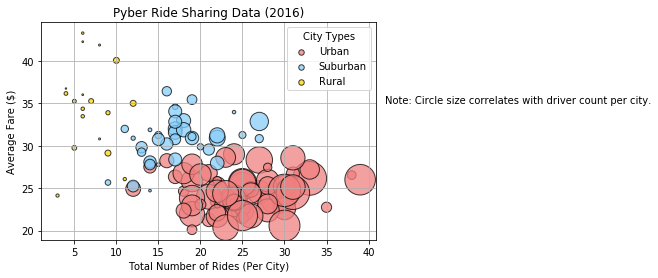

In [78]:
 # Obtain the x and y coordinates for each of the three city types
urban1 = city_ride.loc[(city_ride.type=="Urban")]
urban = urban1.groupby(["city"])
urban_fare = urban["fare"].mean()
urban_count = urban["city"].count()
urban_dc = urban["driver_count"].sum()

suburban1 = city_ride.loc[(city_ride.type=="Suburban")]
suburban = suburban1.groupby(["city"])
suburban_fare = suburban["fare"].mean()
suburban_count = suburban["city"].count()
suburban_dc = suburban["driver_count"].sum()

rural1 = city_ride.loc[(city_ride.type=="Rural")]
rural = rural1.groupby(["city"])
rural_fare = rural["fare"].mean()
rural_count = rural["city"].count()
rural_dc = rural["driver_count"].sum()

# Build the scatter plots for each city types
urban_plot = plt.scatter(urban_count, urban_fare, marker="o", facecolors="lightcoral", edgecolors="black", label="Urban", 
           s=urban_dc/2, alpha=0.75)
suburban_plot = plt.scatter(suburban_count, suburban_fare, marker="o", facecolors="lightskyblue", edgecolors="black", label="Suburban", 
           s=suburban_dc/2, alpha=0.75)
rural_plot = plt.scatter(rural_count, rural_fare, marker="o", facecolors="gold", edgecolors="black", label="Rural", 
           s=rural_dc/2, alpha=0.75)
# Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
lgnd = plt.legend(handles=[urban_plot, suburban_plot, rural_plot], markerscale=.5, title="City Types")
for handle in lgnd.legendHandles:
    handle.set_sizes([30.0])
# Incorporate a text label regarding circle size
plt.text(42, 35, 
         'Note: Circle size correlates with driver count per city.')
# Save Figure
plt.savefig("Images/bubleplot.png")

## Bubble Plot of Ride Sharing Data

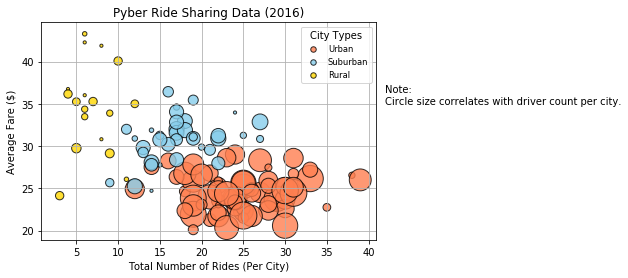

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

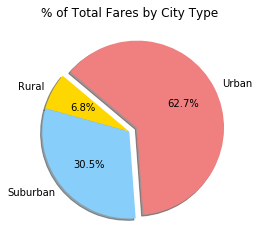

In [76]:
# Calculate Type Percents
percent = (city_ride.groupby("type"))["fare"].sum()/city_ride["fare"].sum() 

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, .1)
plt.pie(percent, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Images/totalfare.png")

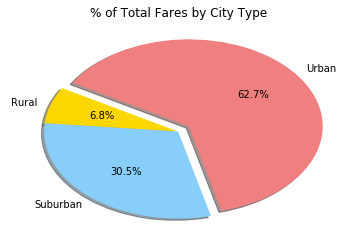

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

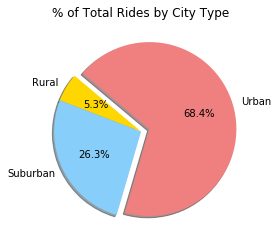

In [77]:
# Calculate Ride Percents
percent1 = (city_ride.groupby("type"))["ride_id"].count()/len(city_ride["ride_id"])
percent1
# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, .1)
plt.pie(percent1, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("Images/totalride.png")

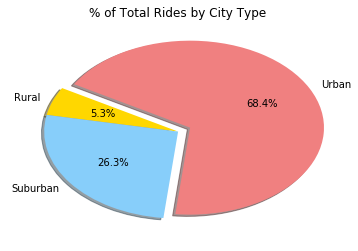

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

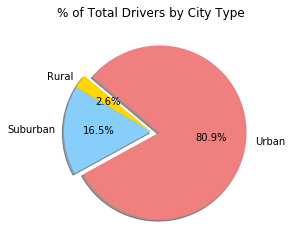

In [81]:
# Calculate Driver Percents
percent2 = (city.groupby("type"))["driver_count"].sum()/city["driver_count"].sum()
#Build Pie Charts
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, .1)
plt.pie(percent2, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("Images/totaldrivers.png")

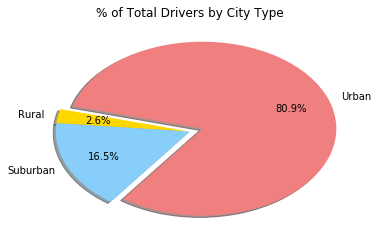

In [6]:
# Show Figure
plt.show()